In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix

# Load Data and Eliminate the ethernet features

In [2]:
test_csv = pd.read_csv("./test_dnsexfiltrator_features.csv")

In [3]:
df_test = pd.DataFrame(test_csv)

In [4]:
df_test.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,10.0.2.39,10.0.2.30,50585,443,2023-11-20 07:14:38,723.164959,338309,467.817191,299583,414.266477,...,0.581814,0.000007,0.002615,0.001723,0.001596,0.001477,0.145471,0.093994,1.517981,True
1,10.0.2.39,10.0.2.30,49856,443,2023-11-18 12:40:10,1102.690792,462500,419.428550,409575,371.432321,...,0.579882,0.000009,0.003008,0.001682,0.001566,0.001419,0.116139,0.087584,1.787810,True
2,10.0.2.39,10.0.2.30,50713,443,2023-11-20 12:17:06,998.328766,372365,372.988351,327656,328.204507,...,0.580554,0.000012,0.003395,0.001656,0.001519,0.001377,0.121489,0.082321,2.049613,True
3,10.0.2.39,10.0.2.30,50737,443,2023-11-20 13:16:41,1827.246640,409905,224.329322,377442,206.563248,...,0.580592,0.000009,0.002976,0.001661,0.001538,0.001531,0.123076,0.043545,1.792274,True
4,10.0.2.39,10.0.2.30,50300,443,2023-11-19 14:09:52,1021.983135,506077,495.191146,444110,434.557073,...,0.579791,0.000003,0.001870,0.001636,0.001559,0.001479,0.123094,0.083809,1.143304,True


In [5]:
# below = test
df_test = df_test.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)

# Add Class Label to the data and Join the data

In [6]:
df_test['Class']= 0 # dnsexfiltrator

In [7]:
df_test

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,723.164959,338309,467.817191,299583,414.266477,8490.815669,92.145622,179.233493,230.0,-1.652813,0.514109,4.364102e+04,208.904343,359.057012,359.238562,0.0,-0.002607,1.718763,0.581814,0
1,1102.690792,462500,419.428550,409575,371.432321,6202.383052,78.755210,160.751152,201.0,-1.533188,0.489920,1.013552e+05,318.363326,549.013521,549.207889,0.0,-0.001832,1.724487,0.579882,0
2,998.328766,372365,372.988351,327656,328.204507,4484.247403,66.964523,142.512419,172.0,-1.321039,0.469886,8.313378e+04,288.329285,496.644999,496.514667,0.0,0.001356,1.722492,0.580554,0
3,1827.246640,409905,224.329322,377442,206.563248,4790.720043,69.215028,145.697076,172.0,-1.140053,0.475061,2.790558e+05,528.257350,909.860015,909.666343,0.0,0.001100,1.722380,0.580592,0
4,1021.983135,506077,495.191146,444110,434.557073,6088.496873,78.028821,160.098905,201.0,-1.572538,0.487379,8.701274e+04,294.979224,508.767841,508.819504,0.0,-0.000525,1.724758,0.579791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2462.327343,553062,224.609454,509823,207.049238,4732.555003,68.793568,146.020745,174.0,-1.220140,0.471122,5.064610e+05,711.660739,1227.297479,1227.599235,0.0,-0.001272,1.724554,0.579860,0
105,5221.332085,1469035,281.352532,1320336,252.873401,4416.304281,66.455280,144.676919,174.0,-1.323736,0.459336,2.273074e+06,1507.671601,2607.533444,2607.296905,0.0,0.000471,1.729510,0.578198,0
106,1935.792473,610755,315.506444,556667,287.565433,8649.333466,93.001793,181.983164,231.0,-1.581158,0.511046,3.130285e+05,559.489495,964.386457,964.638246,0.0,-0.001350,1.723690,0.580151,0
107,1593.703146,882007,553.432427,774701,486.101193,8124.523053,90.136136,178.929474,231.0,-1.733063,0.503752,2.116103e+05,460.011143,794.693809,794.929212,0.0,-0.001535,1.727553,0.578853,0


# Split the data and Normalize 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the dataset in 80:20
#X_train, X_test, y_train, y_test = train_test_split(df_binary[[col for col in df_binary.columns if col != "Class"]], 
                                                    #1df_binary["Class"], test_size=0.2)
#X_train.shape, X_test.shape

In [9]:
x_test = df_test[[col for col in df_test.columns if col != "Class"]]
y_test = df_test["Class"]

In [10]:
x_test.shape, y_test.shape

((109, 19), (109,))

In [11]:
x_test

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation
0,723.164959,338309,467.817191,299583,414.266477,8490.815669,92.145622,179.233493,230.0,-1.652813,0.514109,4.364102e+04,208.904343,359.057012,359.238562,0.0,-0.002607,1.718763,0.581814
1,1102.690792,462500,419.428550,409575,371.432321,6202.383052,78.755210,160.751152,201.0,-1.533188,0.489920,1.013552e+05,318.363326,549.013521,549.207889,0.0,-0.001832,1.724487,0.579882
2,998.328766,372365,372.988351,327656,328.204507,4484.247403,66.964523,142.512419,172.0,-1.321039,0.469886,8.313378e+04,288.329285,496.644999,496.514667,0.0,0.001356,1.722492,0.580554
3,1827.246640,409905,224.329322,377442,206.563248,4790.720043,69.215028,145.697076,172.0,-1.140053,0.475061,2.790558e+05,528.257350,909.860015,909.666343,0.0,0.001100,1.722380,0.580592
4,1021.983135,506077,495.191146,444110,434.557073,6088.496873,78.028821,160.098905,201.0,-1.572538,0.487379,8.701274e+04,294.979224,508.767841,508.819504,0.0,-0.000525,1.724758,0.579791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2462.327343,553062,224.609454,509823,207.049238,4732.555003,68.793568,146.020745,174.0,-1.220140,0.471122,5.064610e+05,711.660739,1227.297479,1227.599235,0.0,-0.001272,1.724554,0.579860
105,5221.332085,1469035,281.352532,1320336,252.873401,4416.304281,66.455280,144.676919,174.0,-1.323736,0.459336,2.273074e+06,1507.671601,2607.533444,2607.296905,0.0,0.000471,1.729510,0.578198
106,1935.792473,610755,315.506444,556667,287.565433,8649.333466,93.001793,181.983164,231.0,-1.581158,0.511046,3.130285e+05,559.489495,964.386457,964.638246,0.0,-0.001350,1.723690,0.580151
107,1593.703146,882007,553.432427,774701,486.101193,8124.523053,90.136136,178.929474,231.0,-1.733063,0.503752,2.116103e+05,460.011143,794.693809,794.929212,0.0,-0.001535,1.727553,0.578853


In [12]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
104    0
105    0
106    0
107    0
108    0
Name: Class, Length: 109, dtype: int64

In [13]:
count_values = y_test.value_counts()
print(count_values)
# 0: dnsexfiltrator
# 1: dnscat2

0    109
Name: Class, dtype: int64


In [14]:
from sklearn import preprocessing

min_max_scaler = joblib.load('min_max_scaler.joblib')

x_test = x_test.values

# Transform the test data using the loaded scaler
xtest_scaled = min_max_scaler.transform(x_test)

X_test_new = pd.DataFrame(xtest_scaled)

In [15]:
X_test_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.291568,0.307313,0.436531,0.311965,0.398906,0.034762,0.097827,0.241993,0.477064,0.102176,0.075627,0.086866,0.291721,0.291628,0.293801,0.0,0.088792,0.991011,0.009117
1,0.447058,0.420583,0.386513,0.427630,0.345010,0.017710,0.054587,0.116697,0.388379,0.139515,0.055897,0.201769,0.446831,0.447491,0.449173,0.0,0.089138,0.992084,0.008003
2,0.404301,0.338374,0.338509,0.341486,0.290618,0.004908,0.016513,-0.006948,0.299694,0.205736,0.039556,0.165492,0.404271,0.404522,0.406076,0.0,0.090561,0.991710,0.008390
3,0.743905,0.372613,0.184846,0.393840,0.137562,0.007192,0.023780,0.014641,0.299694,0.262229,0.043777,0.555553,0.744263,0.743573,0.743983,0.0,0.090447,0.991689,0.008412
4,0.413992,0.460328,0.464826,0.463946,0.424437,0.016862,0.052241,0.112275,0.388379,0.127233,0.053824,0.173215,0.413694,0.414469,0.416140,0.0,0.089721,0.992134,0.007950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.004094,0.503181,0.185135,0.533048,0.138173,0.006758,0.022419,0.016836,0.305810,0.237231,0.040564,1.008293,1.004156,1.004037,1.004012,0.0,0.089388,0.992096,0.007990
105,2.134444,1.338605,0.243789,1.385365,0.195832,0.004402,0.014869,0.007726,0.305810,0.204894,0.030951,4.525435,2.132148,2.136549,2.132433,0.0,0.090166,0.993025,0.007031
106,0.788375,0.555800,0.279092,0.582308,0.239483,0.035943,0.100591,0.260634,0.480122,0.124542,0.073129,0.623189,0.788520,0.788313,0.788943,0.0,0.089353,0.991934,0.008158
107,0.648223,0.803199,0.525028,0.811588,0.489293,0.032032,0.091338,0.239932,0.480122,0.077126,0.067179,0.421276,0.647554,0.649077,0.650142,0.0,0.089271,0.992658,0.007409


In [16]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title("Confusion Matrix")
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Exfiltration", "C&C"], yticklabels=["Exfiltration", "C&C"])
    
    #labels = ["C&C", "Exfiltration"]
    #plt.xticks(ticks=[0.5, 1.5], labels=labels)
    #plt.yticks(ticks=[0.5, 1.5], labels=labels)
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()

# Logistic Regression

In [17]:
model_filename_logistic = './logistic_regression_model.joblib'

In [18]:
logistic_model = joblib.load(model_filename_logistic)

y_pred = logistic_model.predict(X_test_new)

#y_prob = logistic_model.predict_proba(X_test_new)

# save classification report and metrics
#class_report = classification_report(y_test, y_pred, output_dict=True)

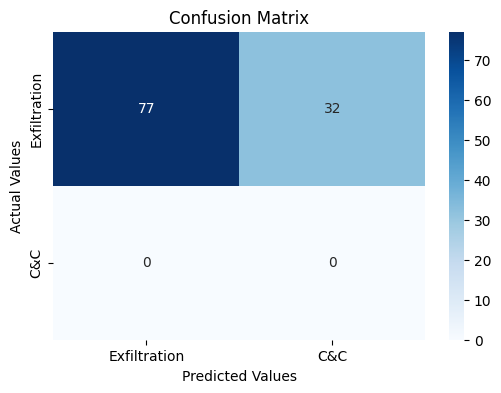

In [19]:
plot_confusion_matrix(y_test, y_pred)

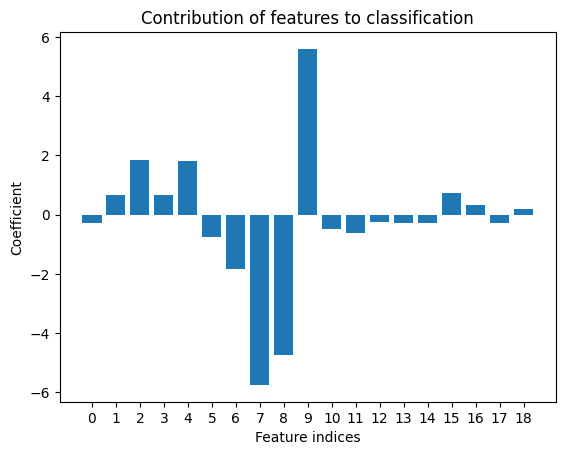

In [20]:
coefficients = logistic_model.coef_

df = df_test.iloc[:,:-1]

feature_coefficients = dict(zip(df.columns, coefficients[0]))

import matplotlib.pyplot as plt

#print(len(df.columns.tolist()))
#print(len(coefficients[0]))

plt.bar(range(len(df.columns)), coefficients[0])
plt.xlabel("Feature indices")
plt.ylabel("Coefficient")
plt.title("Contribution of features to classification")
plt.xticks(range(len(df.columns)), range(len(df.columns)))  # Facultatif : pour afficher les indices sur l'axe x
plt.show()

In [38]:
print(df.columns[7] + ' ' + str(feature_coefficients['PacketLengthMean']))
print(df.columns[8] + ' ' + str(feature_coefficients['PacketLengthMedian']))
print(df.columns[9] + ' ' + str(feature_coefficients['PacketLengthSkewFromMedian']))

PacketLengthMean -5.746236357626092
PacketLengthMedian -4.74800519597109
PacketLengthSkewFromMedian 5.5940846104771556


In [39]:
for i in range(len(df.columns)):
    print(df.columns[i])

Duration
FlowBytesSent
FlowSentRate
FlowBytesReceived
FlowReceivedRate
PacketLengthVariance
PacketLengthStandardDeviation
PacketLengthMean
PacketLengthMedian
PacketLengthSkewFromMedian
PacketLengthCoefficientofVariation
PacketTimeVariance
PacketTimeStandardDeviation
PacketTimeMean
PacketTimeMedian
PacketTimeMode
PacketTimeSkewFromMedian
PacketTimeSkewFromMode
PacketTimeCoefficientofVariation


In [22]:
'''
import sklearn.metrics as metrics

y_pred = logistic_model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
'''

'\nimport sklearn.metrics as metrics\n\ny_pred = logistic_model.predict_proba(X_test_new)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)\nauc = metrics.roc_auc_score(y_test, y_pred)\nplt.plot(fpr,tpr,label="data 1, auc="+str(auc))\nplt.legend(loc=4)\nplt.show()\n'

# SVM

In [23]:
from sklearn import svm

In [24]:
model_filename_svm = './svm_model.joblib'

In [25]:
svm_model = joblib.load(model_filename_svm)
y_pred = svm_model.predict(X_test_new)

# save classification report and metrics
#class_report = classification_report(y_test, y_pred, output_dict=True)

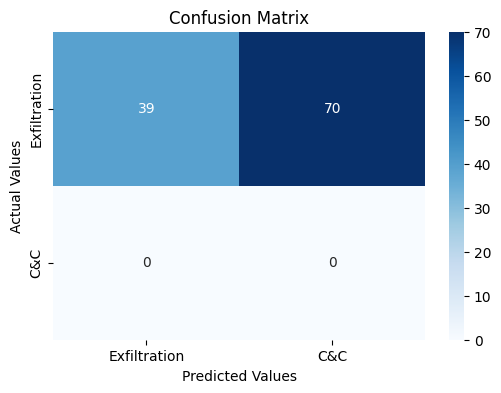

In [26]:
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes

In [27]:
model_filename_nb = './naive_bayes_model.joblib'

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
naive_bayes_model = joblib.load(model_filename_nb)

y_pred = naive_bayes_model.predict(X_test_new)

# save classification report and metrics
#class_report = classification_report(y_test, y_pred, output_dict=True)

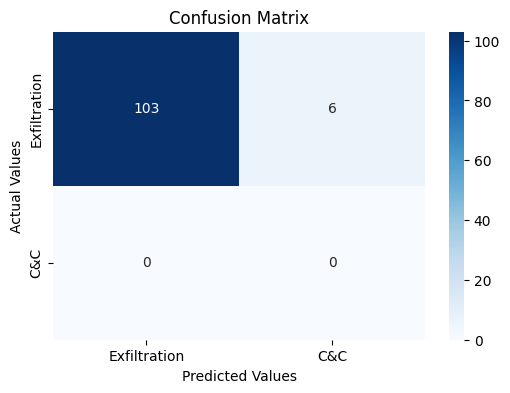

In [30]:
plot_confusion_matrix(y_test, y_pred)

# Decision Tree

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [32]:
model_filename_tree = './decision_tree_model.joblib'

In [33]:
tree_model = joblib.load(model_filename_tree)

In [34]:
'''import utils
utils.DT_to_PNG(clf, lbc.feature_names, "Tree_task1")
clf.plot_tree(tree1)
plt.show()
'''
from sklearn import tree
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_8 <= 0.39
|   |--- class: 1
|--- feature_8 >  0.39
|   |--- class: 0



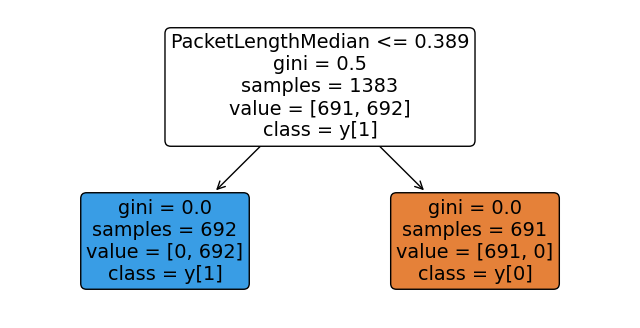

In [35]:
# Affichage de l'arbre de décision
plt.figure(figsize=(8,4))
plot_tree(tree_model, filled=True, feature_names=df.columns, class_names=True, rounded=True)
plt.show()

In [36]:
y_pred = tree_model.predict(X_test_new)

# save classification report and metrics
#class_report = classification_report(y_test, y_pred, output_dict=True, zero_division='warn')

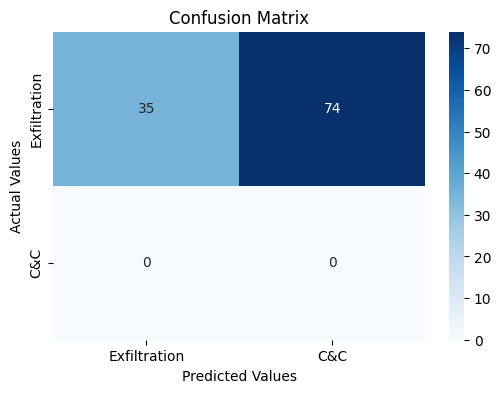

In [37]:
plot_confusion_matrix(y_test, y_pred)